In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#Load dataset 
dataset = pd.read_csv(r"C:\Users\khadija\Desktop\Cours\Python Data Mining\Project_regression/multi_access_edge.csv")

In [3]:
#Shape
print(dataset.shape)

(13843, 9)


In [4]:
#type 
print(dataset.dtypes)

time                int64
job               float64
task                int64
machine           float64
priority          float64
CPU_request       float64
memory_request    float64
disk_space          int64
schudeling          int64
dtype: object


In [5]:
# descriptions
dataset.describe()

,time,job,task,machine,priority,CPU_request,memory_request,disk_space,schudeling
count,13843.00000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000
mean,5.32818,4.262609,114.529148,14.955826,11.111118,7.407209,1.667493,101538.493101,0.037853
std,2.03417,3.987488,87.758136,6.500494,5.645275,4.974600,3.733947,1066.084413,0.545712
min,0.00000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,95960.000000,0.000000
25%,4.00000,0.400000,39.000000,10.200000,6.800000,3.200000,0.000000,100900.000000,0.000000
50%,6.00000,3.400000,89.000000,14.400000,10.800000,7.300000,0.000000,101630.000000,0.000000
75%,7.00000,7.100000,180.000000,19.700000,15.550000,11.400000,1.600000,102260.000000,0.000000
max,9.00000,15.700000,352.000000,37.900000,29.000000,22.300000,61.800000,104430.000000,22.000000


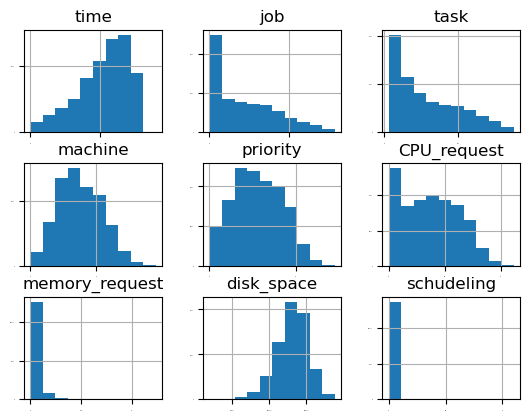

In [6]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

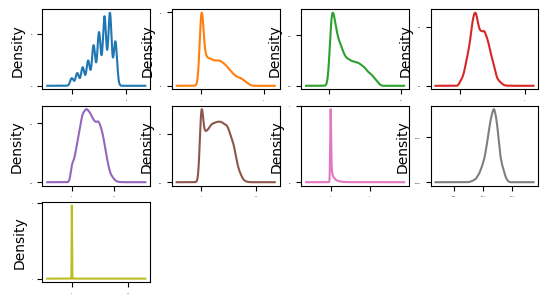

In [7]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
plt.show()

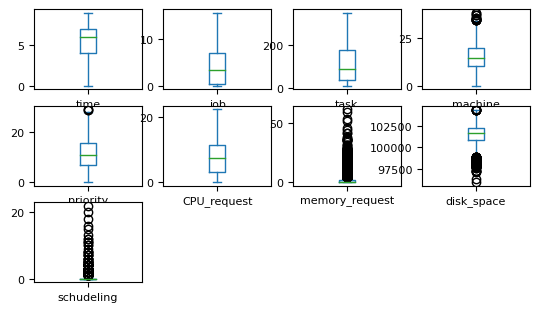

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
plt.show()

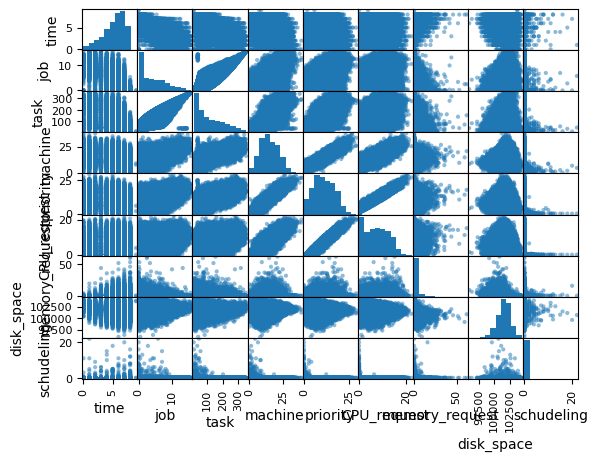

In [9]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [10]:
#check missing value
dataset.isnull().sum()

time              0
job               0
task              0
machine           0
priority          0
CPU_request       0
memory_request    0
disk_space        0
schudeling        0
dtype: int64

<AxesSubplot:>

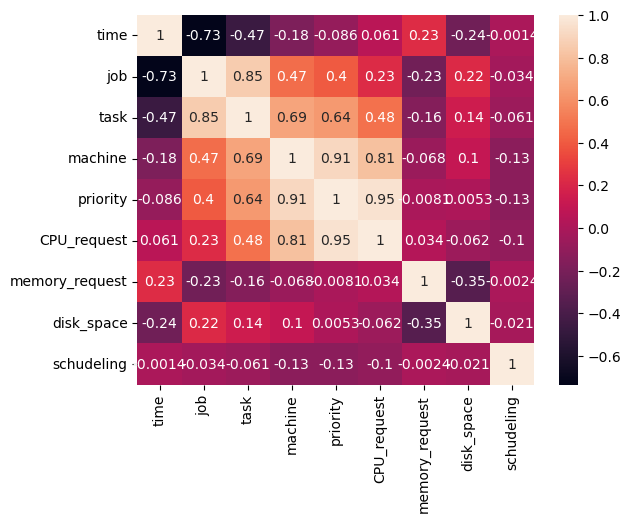

In [11]:
# Get the most important features
dataset.corr()
# Plot the correlation matrix
sns.heatmap(dataset.corr(), annot=True)

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [13]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [14]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [15]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: -0.323496 (0.243458)
LASSO: -0.331064 (0.250219)
EN: -0.330966 (0.250007)
KNN: -0.357741 (0.246756)
CART: -0.625509 (0.255722)
SVR: -0.335693 (0.249055)


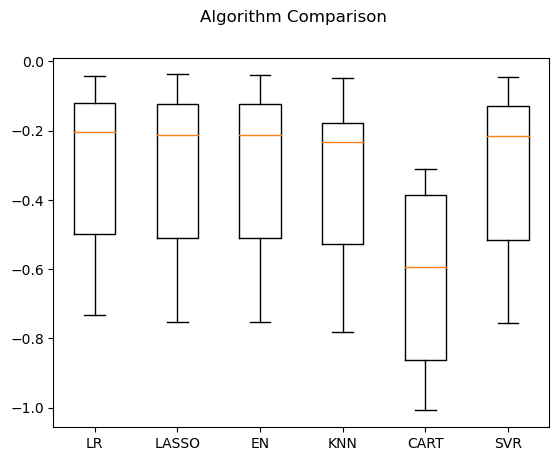

In [16]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
 kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

ScaledLR: -0.323496 (0.243458)
ScaledLASSO: -0.332031 (0.251087)
ScaledEN: -0.332031 (0.251087)
ScaledKNN: -0.351667 (0.222785)
ScaledCART: -0.649498 (0.335192)
ScaledSVR: -0.330799 (0.248665)


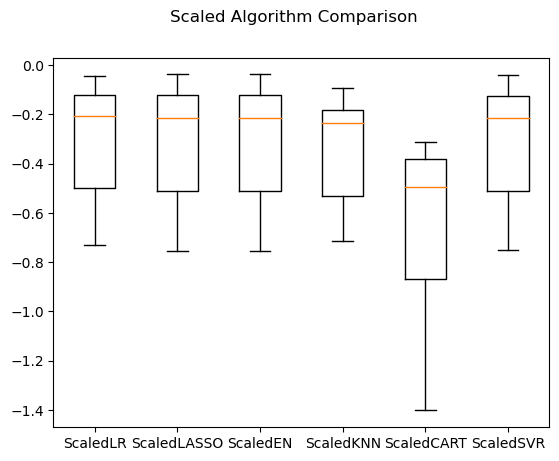

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.315094 using {'n_neighbors': 17}
-0.625617 (0.385497) with: {'n_neighbors': 1}
-0.393992 (0.238498) with: {'n_neighbors': 3}
-0.351566 (0.222857) with: {'n_neighbors': 5}
-0.338052 (0.229084) with: {'n_neighbors': 7}
-0.332528 (0.231847) with: {'n_neighbors': 9}
-0.323553 (0.228633) with: {'n_neighbors': 11}
-0.321435 (0.231581) with: {'n_neighbors': 13}
-0.320155 (0.234238) with: {'n_neighbors': 15}
-0.315094 (0.232828) with: {'n_neighbors': 17}
-0.315407 (0.234019) with: {'n_neighbors': 19}
-0.315318 (0.234951) with: {'n_neighbors': 21}


In [20]:
#Finalize model 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=17)
model.fit(rescaledX, Y_train)

KNeighborsRegressor(n_neighbors=17)

In [21]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.15110697902256945


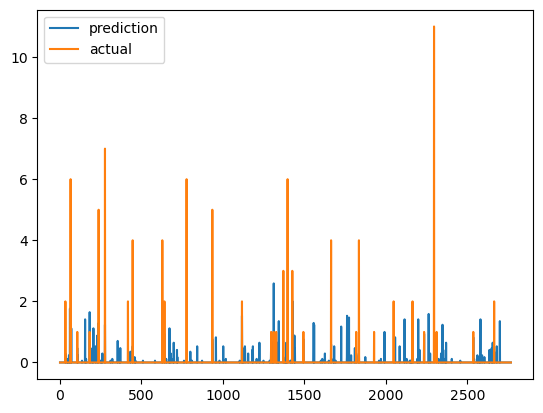

In [22]:
df = pd.DataFrame({'prediction': predictions, 'actual': Y_validation})
df.plot()
plt.show()